In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=';',)

In [3]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DE8D4140F0>,
      dtype=object)

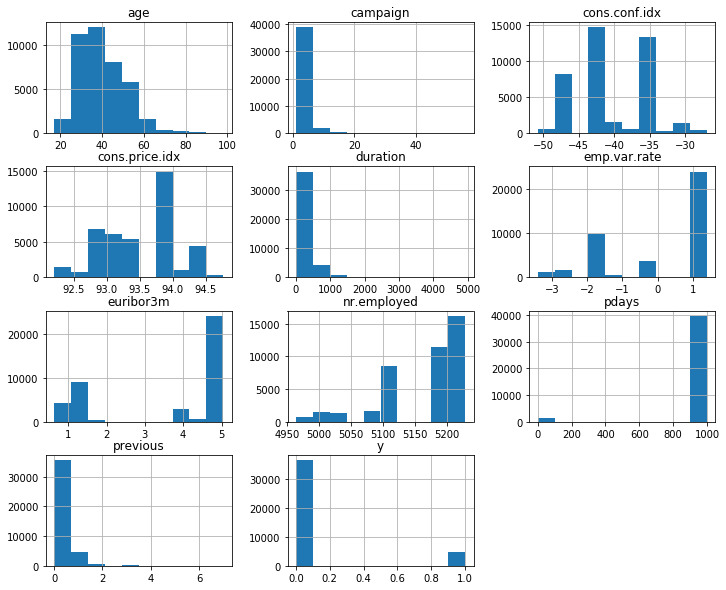

In [5]:
df.hist(figsize=(12, 10))

In [6]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [7]:
df['y'].value_counts()/len(df)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [8]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [9]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(df, figsize=(18, 12))

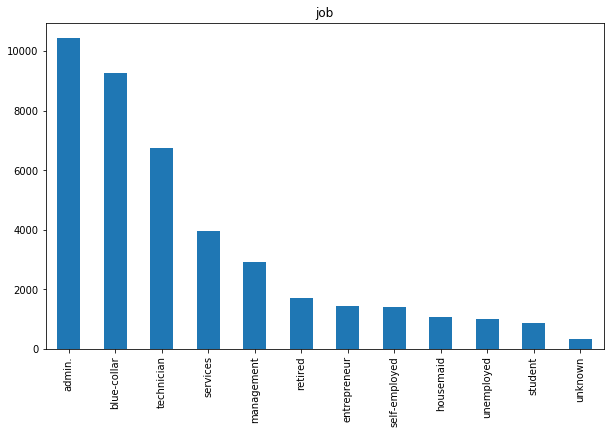

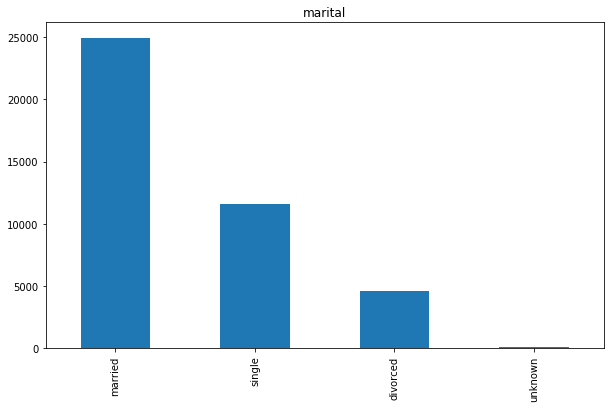

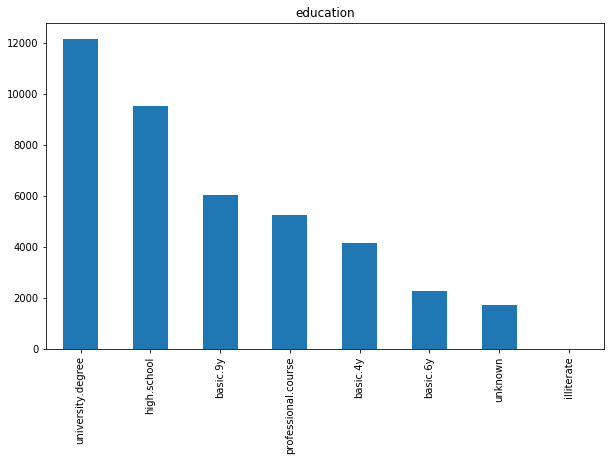

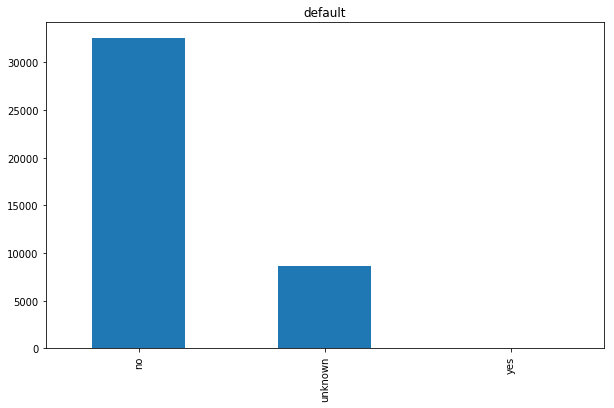

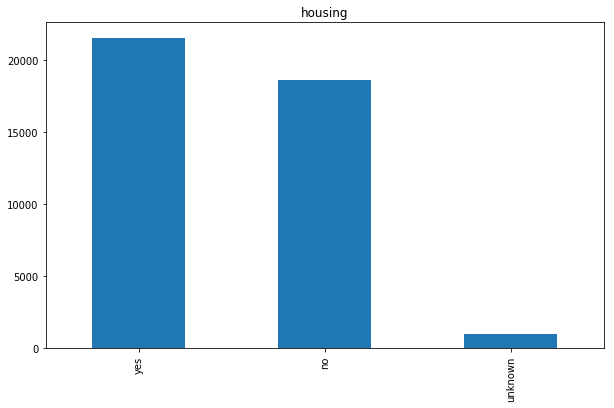

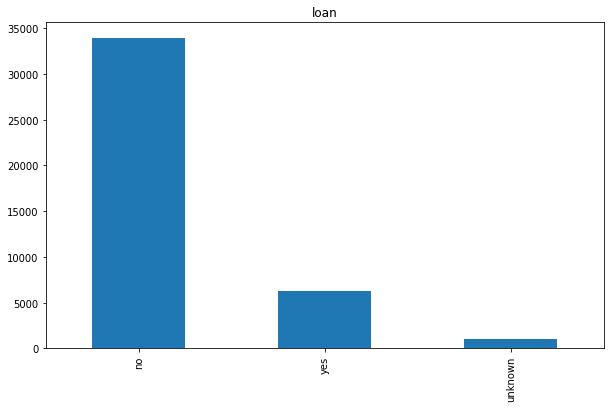

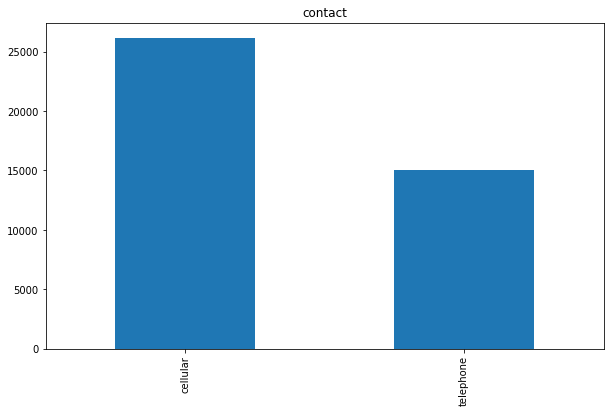

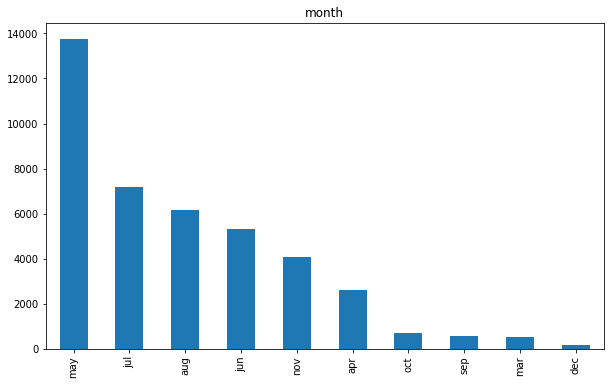

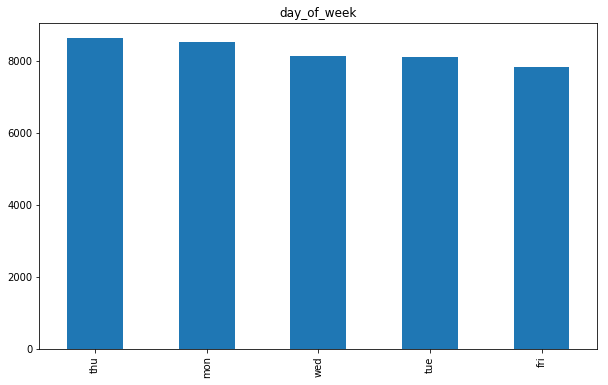

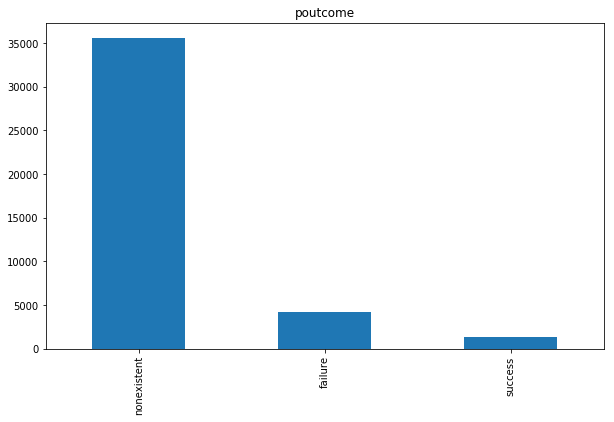

In [10]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for i in categorical:
    df[i].value_counts().plot(kind='bar', figsize=(10, 6), title=i)
    plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
# df = df.drop('duration', axis=1)
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

def scale(df_raw):
    scaler = MinMaxScaler()

    df_raw[numerical] = scaler.fit_transform(df_raw[numerical])
    df_scaled = pd.get_dummies(df_raw)

    df_scaled.info()
    return df_scaled

In [12]:
import random
random.seed()
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=18)
for train_index, test_index in split.split(df, df['y']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
#     print (test_index)
#     print(test_set['y'].value_counts())
    
train_set = scale(train_set)
test_set = scale(test_set)
print(test_set.shape)

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 15987 to 14441
Data columns (total 64 columns):
age                              32950 non-null float64
duration                         32950 non-null float64
campaign                         32950 non-null float64
pdays                            32950 non-null float64
previous                         32950 non-null float64
emp.var.rate                     32950 non-null float64
cons.price.idx                   32950 non-null float64
cons.conf.idx                    32950 non-null float64
euribor3m                        32950 non-null float64
nr.employed                      32950 non-null float64
y                                32950 non-null int64
job_admin.                       32950 non-null uint8
job_blue-collar                  32950 non-null uint8
job_entrepreneur                 32950 non-null uint8
job_housemaid                    32950 non-null uint8
job_management                   32950 non-null uint8
job

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
test_set['default_yes'] = 0
print(test_set.shape)
test_set['y'].value_counts()

(8238, 64)


0    7310
1     928
Name: y, dtype: int64

In [14]:
train_set['y'].value_counts()
train_set['y'].value_counts()/len(train_set)
test_set['y'].value_counts()/len(test_set)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [15]:
from sklearn.utils import resample

train_negative = train_set[train_set['y']==0]
upsample_size = len(train_negative)
train_positive = train_set[train_set['y']==1]
train_positive_upsample = resample(train_positive,
                                   replace=True,
                                   n_samples=upsample_size,
                                   random_state=18)
train_upsample = pd.concat([train_negative, train_positive_upsample])
train_upsample = train_upsample.sample(frac=1.0)
train_upsample['y'].value_counts()

1    29238
0    29238
Name: y, dtype: int64

In [16]:
print(train_upsample.shape)
print(test_set.shape)
X_train = train_upsample.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)
y_train = train_upsample['y']
y_test = test_set['y']
print(X_train.shape)
print(X_test.shape)

(58476, 64)
(8238, 64)
(58476, 63)
(8238, 63)


In [17]:
X_imb = train_set.drop('y', axis=1)
y_imb = train_set['y']

X_train = X_imb
y_train = y_imb

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, make_scorer
def fit_classifier(model, X, y, model_type=None, parameters=None, scorer_metrics=None):
    grid_obj = GridSearchCV(estimator=model, param_grid=parameters, scoring=make_scorer(scorer_metrics), cv=3)
    grid_fit = grid_obj.fit(X, y)
    
    train_means = grid_fit.cv_results_['mean_train_score']
    train_stds = grid_fit.cv_results_['std_train_score']
    test_means = grid_fit.cv_results_['mean_test_score']
    test_stds = grid_fit.cv_results_['std_test_score']
    for train_mean, train_std, test_mean, test_std, params in \
        zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
        print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))
  
    model_estimator = grid_fit.best_estimator_
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n----------------")
    print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final recall score on training data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))
    
    best_params = model_estimator.get_params()
    if (model_type == "DT"):
        return best_params.get('max_depth'), best_params.get('min_samples_leaf'), best_params.get('min_samples_split')
    if(model_type == "GB"):
        return best_params.get('learning_rate'), best_params.get('n_estimators'), best_params.get('min_samples_split'),\
                best_params.get('min_samples_leaf')
    if(model_type == "SVM"):
        return best_params.get('kernel'), best_params.get('class_weight')
    if(model_type == "KNN"):
        return best_params.get('n_neighbors')

    return model_estimator

In [19]:
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    print("\n")
    print("\nModel performance on test set\n-----------------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on the testing data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final recall score on the testing data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y, y_pred)))
    return y_pred

In [20]:
from sklearn.tree import DecisionTreeClassifier
parameters_DT = {'max_depth': [6, 7, 8],
                 'min_samples_leaf': [2, 3],
                 'min_samples_split': [2, 3]}
maxdepth, minleaf, minsplit = fit_classifier(DecisionTreeClassifier(random_state=18), X_train, y_train, model_type="DT",
                          parameters=parameters_DT, scorer_metrics=recall_score)
print ("%d, %d, %d" % (maxdepth, minleaf, minsplit))
# y_test_DT = classifier_test(model_DT, X_test, y_test)

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


train: 0.532 (+/-0.048); test: 0.489 (+/-0.060) for {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
train: 0.532 (+/-0.048); test: 0.489 (+/-0.060) for {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}
train: 0.532 (+/-0.048); test: 0.490 (+/-0.061) for {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}
train: 0.532 (+/-0.048); test: 0.490 (+/-0.061) for {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}
train: 0.576 (+/-0.046); test: 0.509 (+/-0.023) for {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
train: 0.576 (+/-0.046); test: 0.509 (+/-0.023) for {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}
train: 0.574 (+/-0.041); test: 0.509 (+/-0.024) for {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}
train: 0.574 (+/-0.041); test: 0.509 (+/-0.024) for {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 3}
train: 0.595 (+/-0.058); test: 0.489 (+/-0.040) for {'max_depth': 8, 'mi

In [21]:
full_size = len(X_train)
pack_size = int (0.1*full_size)

avail_sizes = np.linspace(0.1, 1, num=10)
print (avail_sizes)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [22]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(train_sizes, train_scores, valid_scores):
#     train_sizes, train_scores, valid_scores = learning_curve( \
#         model, X_train, y_train, train_sizes=train_sizes, cv=3)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores,axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std,  alpha=0.1, color='r')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, 
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = 'Training Score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label = 'Cross-validation score')
    plt.legend(loc='best')
    plt.show()


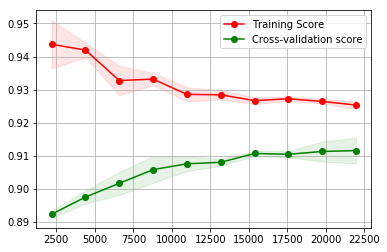

In [23]:
# from sklearn.model_selection import learning_curve
dtc = DecisionTreeClassifier(max_depth=maxdepth, min_samples_split=minsplit, min_samples_leaf=minleaf, random_state=18)
train_sizes, train_scores, valid_scores = learning_curve(dtc, X_train, y_train, train_sizes=avail_sizes, cv=3)
# plot_learning_curve(dtc, X_train, y_train, train_sizes=avail_sizes, cv=3)
plot_learning_curve(train_sizes, train_scores, valid_scores)

In [24]:
train_scores

array([[0.95400729, 0.93852459, 0.93852459],
       [0.94514   , 0.94035966, 0.94035966],
       [0.93898922, 0.9295796 , 0.9295796 ],
       [0.93580697, 0.93182336, 0.93182336],
       [0.93153055, 0.92688701, 0.92716016],
       [0.9290538 , 0.92639806, 0.9297367 ],
       [0.92741935, 0.92728928, 0.92520812],
       [0.92653084, 0.9268723 , 0.9281812 ],
       [0.92670342, 0.92559057, 0.92685518],
       [0.92684148, 0.92370026, 0.92533916]])

In [25]:
train_sizes

array([ 2196,  4393,  6589,  8786, 10983, 13179, 15376, 17572, 19769,
       21966])

In [27]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, y_test_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', label='dtc roc(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Bank Marketing')
    plt.legend(loc='lower right')
    plt.show()

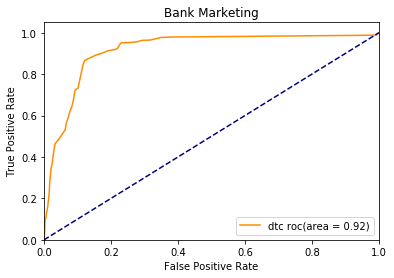

In [28]:
dtc.fit(X_train, y_train)
# y_test_score = dtc.predict(X_test)
y_dtc_score = dtc.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_dtc_score)

# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, color='darkorange', label='dtc roc(area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Bank Marketing')
# plt.legend(loc='lower right')
# plt.show()

In [31]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import itertools
def plot_confusion_matrix(confusion_matrix=None):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    num_class = ["not subscribe", "subscribe"]
    plt.title("BM confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(num_class))
    plt.xticks(tick_marks, num_class, rotation=45)
    plt.yticks(tick_marks, num_class)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.0
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if confusion_matrix[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    

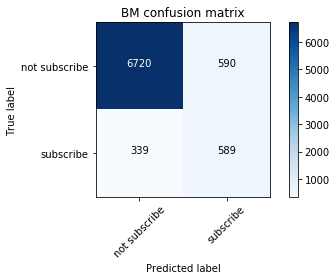

In [32]:
confusion_matrix_DT = confusion_matrix(y_test, dtc.predict(X_test))
plot_confusion_matrix(confusion_matrix_DT)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
parameters_GB = {'learning_rate': [0.2, 0.4],
                 'n_estimators': [27, 50, 100],
#                  'min_samples_split': [2, 3],
#                  'min_samples_leaf': [2, 3]
                }
lr, n_estimators, minsplit_gb, minleaf_gb = fit_classifier(
                        GradientBoostingClassifier(random_state=18), X_train, y_train, model_type="GB",
                        parameters=parameters_GB, scorer_metrics=recall_score)
print ("%.3f, %d, %d, %d" % (lr, n_estimators, minsplit_gb, minleaf_gb))

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


train: 0.522 (+/-0.027); test: 0.501 (+/-0.040) for {'learning_rate': 0.2, 'n_estimators': 27}
train: 0.551 (+/-0.027); test: 0.517 (+/-0.028) for {'learning_rate': 0.2, 'n_estimators': 50}
train: 0.581 (+/-0.020); test: 0.522 (+/-0.019) for {'learning_rate': 0.2, 'n_estimators': 100}
train: 0.554 (+/-0.014); test: 0.518 (+/-0.035) for {'learning_rate': 0.4, 'n_estimators': 27}
train: 0.574 (+/-0.009); test: 0.515 (+/-0.039) for {'learning_rate': 0.4, 'n_estimators': 50}
train: 0.622 (+/-0.007); test: 0.525 (+/-0.012) for {'learning_rate': 0.4, 'n_estimators': 100}



Model performance on training set
----------------
Final accuracy score on the training data: 0.9327
Final precision score on training data: 0.7513
Final recall score on training data: 0.6013
Final ROC AUC score on training data: 0.7880


The best parameters are: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=3,
              max_features=None, m

In [35]:
print ("%.3f, %d, %d, %d" % (lr, n_estimators, minsplit_gb, minleaf_gb))

0.100, 100, 2, 2


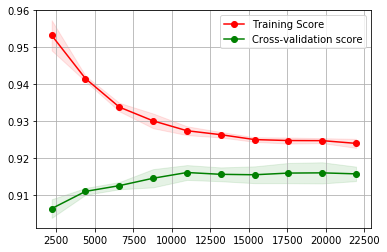

In [36]:
gbc=GradientBoostingClassifier(learning_rate=lr, n_estimators=100, \
                               min_samples_split=minsplit_gb, min_samples_leaf=minleaf_gb)
train_sizes, train_scores, valid_scores = learning_curve( \
         gbc, X_train, y_train, train_sizes=avail_sizes, cv=3)
# plot_learning_curve(gbc, X_train, y_train, train_sizes=avail_sizes, cv=3)
plot_learning_curve(train_sizes, train_scores, valid_scores)

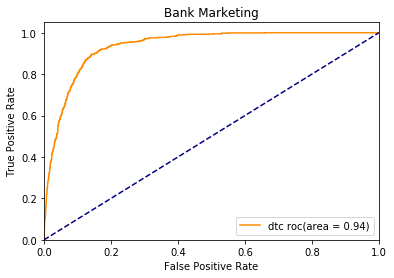

In [37]:
gbc.fit(X_train, y_train)
y_gbc_score = gbc.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_gbc_score)

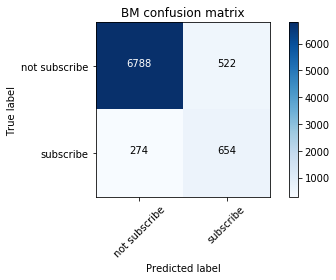

In [39]:
confusion_matrix_GB = confusion_matrix(y_test, gbc.predict(X_test))
plot_confusion_matrix(confusion_matrix_GB)

In [40]:
from sklearn import svm
parameters_svm = {'kernel':['rbf', 'sigmoid'],
                  'class_weight': [{1:1}, {1:5}],
                  'random_state': [18]}
opt_kernel, opt_class_weight = fit_classifier(
                        svm.SVC(), X_train, y_train, model_type="SVM",
                        parameters=parameters_svm, scorer_metrics=recall_score)
print (opt_kernel)
print(opt_class_weight)

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\li

train: 0.195 (+/-0.003); test: 0.195 (+/-0.004) for {'class_weight': {1: 1}, 'kernel': 'rbf', 'random_state': 18}
train: 0.195 (+/-0.002); test: 0.195 (+/-0.004) for {'class_weight': {1: 1}, 'kernel': 'sigmoid', 'random_state': 18}
train: 0.745 (+/-0.009); test: 0.731 (+/-0.037) for {'class_weight': {1: 5}, 'kernel': 'rbf', 'random_state': 18}
train: 0.667 (+/-0.023); test: 0.664 (+/-0.060) for {'class_weight': {1: 5}, 'kernel': 'sigmoid', 'random_state': 18}



Model performance on training set
----------------
Final accuracy score on the training data: 0.8742
Final precision score on training data: 0.4652
Final recall score on training data: 0.7821
Final ROC AUC score on training data: 0.8340


The best parameters are: SVC(C=1.0, cache_size=200, class_weight={1: 5}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=18,
  shrinking=True, tol=0.001, verbose=False)
rbf
{1: 5}


In [41]:
print (opt_kernel)
print(opt_class_weight)

rbf
{1: 5}


C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\li

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\li

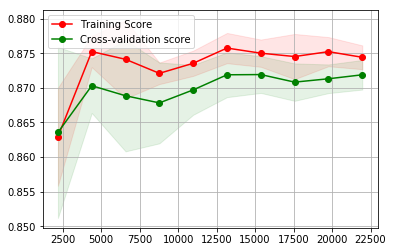

In [42]:
svc = svm.SVC(kernel=opt_kernel, class_weight=opt_class_weight)
train_sizes, train_scores, valid_scores = learning_curve( \
         svc, X_train, y_train, train_sizes=avail_sizes, cv=3)
plot_learning_curve(train_sizes, train_scores, valid_scores)

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


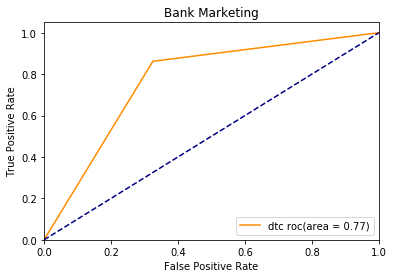

In [43]:
svc.fit(X_train, y_train)
# y_svc_score = svc.predict_proba(X_test)[:, 1]
y_svc_score = svc.predict(X_test)
plot_roc_curve(y_test, y_svc_score)

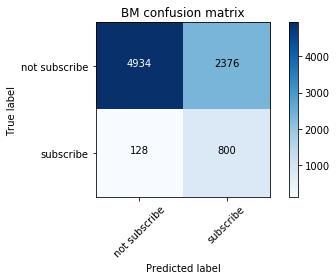

In [44]:
confusion_matrix_SVC = confusion_matrix(y_test, svc.predict(X_test))
plot_confusion_matrix(confusion_matrix_SVC)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
parameters_knn = {'n_neighbors':[17, 27, 51, 75]}
opt_n_neighbors = fit_classifier(
                        KNeighborsClassifier(), X_train, y_train, model_type="KNN",
                        parameters=parameters_knn, scorer_metrics=recall_score)
print(opt_n_neighbors)

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


train: 0.213 (+/-0.004); test: 0.188 (+/-0.020) for {'n_neighbors': 17}
train: 0.182 (+/-0.011); test: 0.166 (+/-0.022) for {'n_neighbors': 27}
train: 0.154 (+/-0.005); test: 0.148 (+/-0.008) for {'n_neighbors': 51}
train: 0.146 (+/-0.003); test: 0.143 (+/-0.006) for {'n_neighbors': 75}



Model performance on training set
----------------
Final accuracy score on the training data: 0.9031
Final precision score on training data: 0.7245
Final recall score on training data: 0.2260
Final ROC AUC score on training data: 0.6076


The best parameters are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')
17


C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\li

C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\weiguang\Anaconda3\envs\test\li

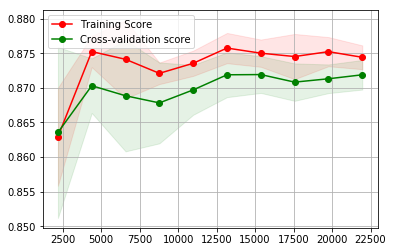

In [47]:
knn = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
train_sizes, train_scores, valid_scores = learning_curve( \
         svc, X_train, y_train, train_sizes=avail_sizes, cv=3)
plot_learning_curve(train_sizes, train_scores, valid_scores)

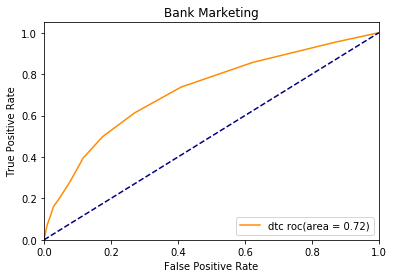

In [48]:
knn.fit(X_train, y_train)
y_knn_score = knn.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_knn_score)

In [ ]:
confusion_matrix_KNN = confusion_matrix(y_test, knn.predict(X_test))
plot_confusion_matrix(confusion_matrix_KNN)

In [55]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

Using TensorFlow backend.


In [56]:
from sklearn.model_selection import train_test_split
random.seed()

# convert pandas dataframe to numpy array. keras does not take pandas dataframe
X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_train.values, y_train.values, 
                                                              test_size=0.2, random_state=18)
X_train_NN.shape

(26360, 63)

In [57]:
import keras.backend as K
from sklearn.metrics import recall_score

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [65]:
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.show()
    
def plot_recall(hist):
    plt.plot(hist.history['recall'])
    plt.plot(hist.history['val_recall'])
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='lower right')
    plt.show()

In [67]:
from keras.callbacks import ModelCheckpoint

def fit_NNClassifier(parameters, X_train, y_train, X_val, y_val, 
                     input_shape, epochs=40, batch_size=40, metrics=recall):
    for activation in parameters.get('activation'): 
        for optimizer in parameters.get('optimizer'):
            for hidden in parameters.get('hiddens'):
                nnm = Sequential()
                nnm.add(Dense(hidden, activation=activation, input_shape=(input_shape, )))  # X_train_NN.shape[1] = 63
                nnm.add(Dropout(.2))
                nnm.add(Dense(1, activation=activation))


                nnm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metrics])
                nnm.summary()

                filepath = '';
                if (isinstance(optimizer, str)):
                    filepath = 'weights_best_' + activation + '_' + optimizer + '.hdf5'
                else:
                    filepath = 'weights_best_' + activation + '_' + \
                        str(type(optimizer)).strip('<>\'').split('.')[-1] + '.hdf5'
                    
                checkpointer = ModelCheckpoint(filepath, monitor=recall, verbose=0, save_best_only=False, mode='max')
                print('############################################')
                history = nnm.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=0)
                print (history.history)
                plot_loss(history)
                plot_recall(history)

    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                4096      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 65        
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [0.2741939734119204, 0.2628508203172539, 0.255126215709721, 0.24669228408242574, 0.23568217881442202, 0.22802533426396945, 0.22178042148648336, 0.21698748859631997, 0.2147687269948502, 0.21238797455347724, 0.21160736955894505, 0.20944641608524395, 0.20869899551314902, 0.20893092004635988, 0.20739722362689797, 0.20693345886848766, 0.206115249550

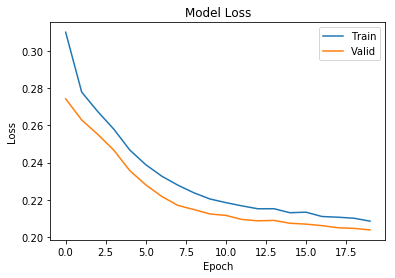

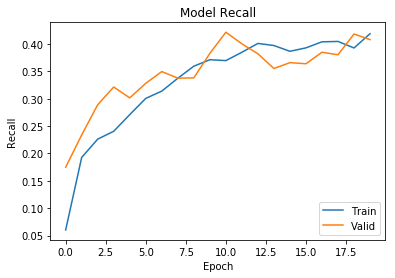

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [0.27808725836154, 0.26606525051123453, 0.2587030332575076, 0.25142301987624854, 0.2440557025587794, 0.23649232433218514, 0.22924051620348812, 0.22368883173093088, 0.21911981353629523, 0.21634411947499277, 0.21286854747123168, 0.21081733364436622, 0.20858155132154052, 0.20824628567523767, 0.20579504338128432, 0.20502911973885954, 0.204243834671

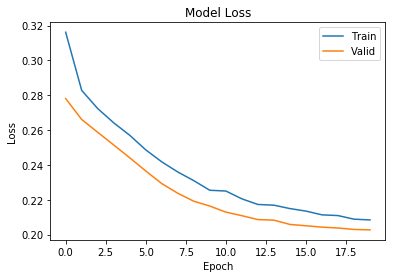

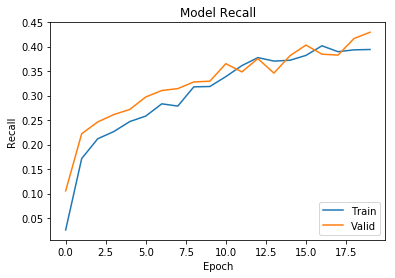

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                4096      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [0.34051653145839306, 0.3349553179985113, 0.3301278978179185, 0.3257333807907264, 0.32112816141208855, 0.3172821278863322, 0.31365412435238565, 0.31045407651498214, 0.3071363298547467, 0.30428329044571417, 0.3023528945554551, 0.29897117583089605, 0.29678270306681287, 0.2949285027606353, 0.29339027327905115, 0.2915645858134413, 0.291052943364079

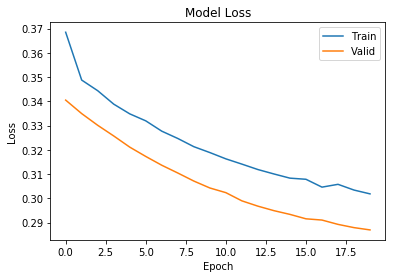

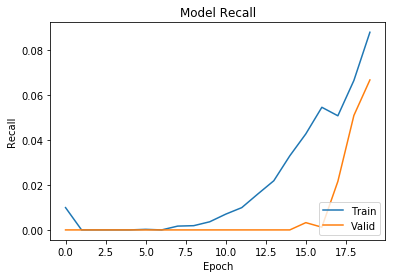

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [0.33684284055721414, 0.33238927536108426, 0.3278411850220155, 0.3239135340828454, 0.3204088014563226, 0.31676398305864, 0.3135263509878801, 0.31022794804732245, 0.30742799921444586, 0.30455738319612596, 0.30202331137313465, 0.29961297958410926, 0.29774107373629066, 0.2958147888028025, 0.29410512505695563, 0.29222925014126827, 0.290829702714325

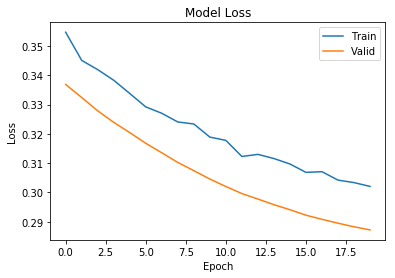

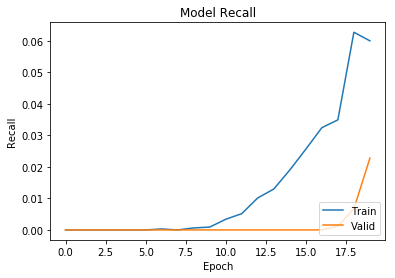

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 64)                4096      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [0.91523425830514, 0.614356823322082, 0.5707073559212937, 0.6973524546767945, 0.5138493104751627, 0.3541755580847831, 0.32399805781059815, 0.3445274518726447, 0.4139534810244223, 0.30540238510766415, 0.4819205053975984, 0.29542475861916956, 0.28466276781511957, 0.26498290254241236, 0.28305586378834857, 0.26620966101090715, 0.2560450328861636, 0

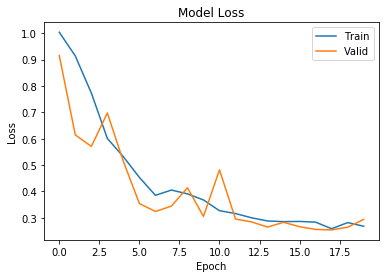

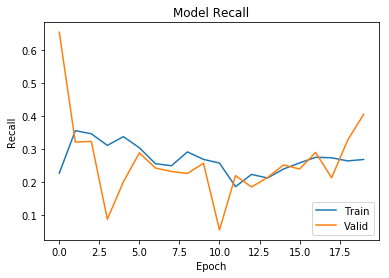

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                2048      
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [0.6583930554719181, 0.46150629459816694, 0.3677277277606753, 0.32952808612485573, 0.30627871692542424, 0.2780145736176617, 0.26594507070159334, 0.25354212350657207, 0.24043975510438043, 0.25062938079758007, 0.25440372311833775, 0.23591234653690696, 0.22307887707295657, 0.2279623540426422, 0.2502698279204969, 0.2245130037185093, 0.2371231632954

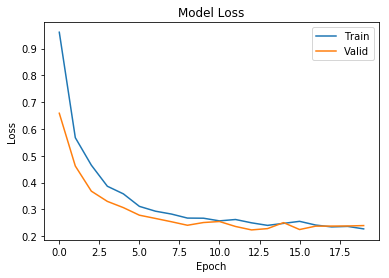

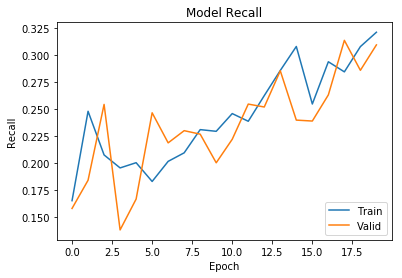

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                4096      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 65        
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.7976935270443029, 1.797

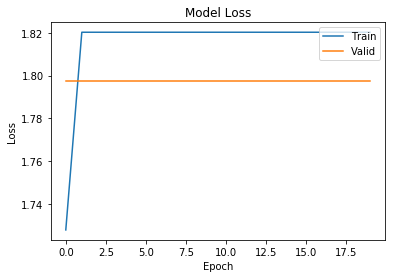

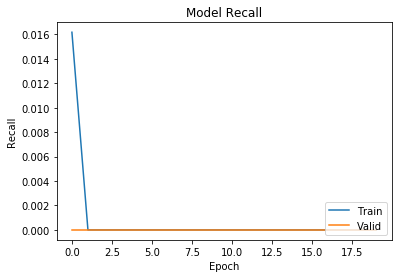

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 32)                2048      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
############################################
{'val_loss': [14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.16428890430873, 14.

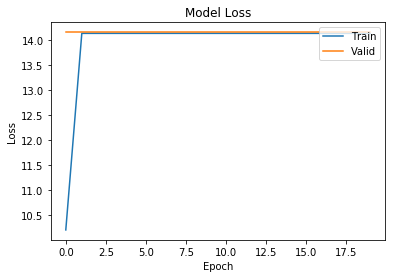

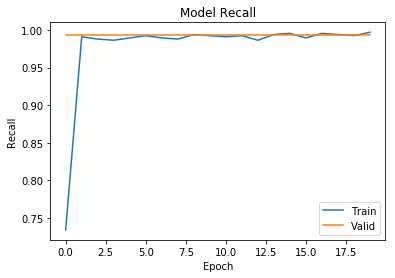

In [68]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9)
parameters = {'activation':['sigmoid', 'relu'], 
              'optimizer': ['adam', 'sgd'],
              'hiddens': [64, 32]}
fit_NNClassifier(parameters, X_train_NN, y_train_NN, X_val_NN, y_val_NN, 
                 X_train_NN.shape[1], epochs=20, batch_size=40, metrics=recall)
                

Train on 26360 samples, validate on 6590 samples
Epoch 1/20
26360/26360 [==============================] - 2s 74us/step - loss: 0.3718 - recall: 0.0234 - val_loss: 0.3365 - val_recall: 0.0000e+00

Epoch 00001: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 2/20
26360/26360 [==============================] - 1s 34us/step - loss: 0.3447 - recall: 0.0000e+00 - val_loss: 0.3313 - val_recall: 0.0000e+00

Epoch 00002: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 3/20
26360/26360 [==============================] - 1s 33us/step - loss: 0.3402 - recall: 0.0000e+00 - val_loss: 0.3263 - val_recall: 0.0000e+00

Epoch 00003: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 4/20
26360/26360 [==============================] - 1s 32us/step - loss: 0.3360 - recall: 0.0000e+00 - val_loss: 0.3220 - val_recall: 0.0000e+00

Epoch 00004: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 5/20
26360/26360 [==============================] - 1s 33us/step - loss: 0.3325 - rec

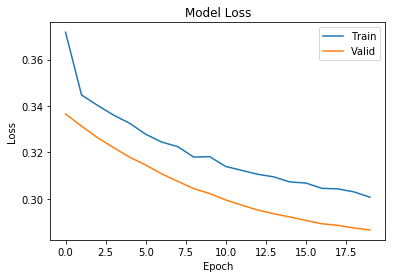

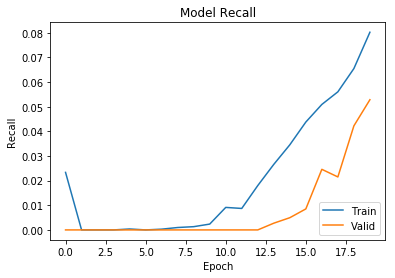

In [69]:
NNM = Sequential()
NNM.add(Dense(64, activation='sigmoid', input_shape=(X_train.values.shape[1], )))  # X_train_NN.shape[1] = 63
NNM.add(Dropout(.2))
NNM.add(Dense(1, activation='sigmoid'))

NNM.compile(loss='binary_crossentropy', optimizer=sgd, metrics=[recall])

checkpointer = ModelCheckpoint('weights_best_sigmoid_adam_fin.hdf5', 
                               monitor=recall, verbose=1, save_best_only=False, mode='max')
hist = NNM.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), 
        epochs=20, batch_size=40, callbacks=[checkpointer], verbose=1)

plot_loss(hist)
plot_recall(hist)

Train on 26360 samples, validate on 6590 samples
Epoch 1/20
26360/26360 [==============================] - 2s 85us/step - loss: 0.3064 - recall: 0.0633 - val_loss: 0.2731 - val_recall: 0.1980

Epoch 00001: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 2/20
26360/26360 [==============================] - 1s 40us/step - loss: 0.2770 - recall: 0.1942 - val_loss: 0.2621 - val_recall: 0.2325

Epoch 00002: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 3/20
26360/26360 [==============================] - 1s 53us/step - loss: 0.2683 - recall: 0.2228 - val_loss: 0.2537 - val_recall: 0.2546

Epoch 00003: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 4/20
26360/26360 [==============================] - 1s 35us/step - loss: 0.2576 - recall: 0.2477 - val_loss: 0.2446 - val_recall: 0.2685

Epoch 00004: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 5/20
26360/26360 [==============================] - 1s 29us/step - loss: 0.2475 - recall: 0.2738 - val_loss: 0.23

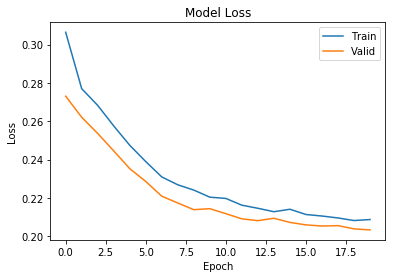

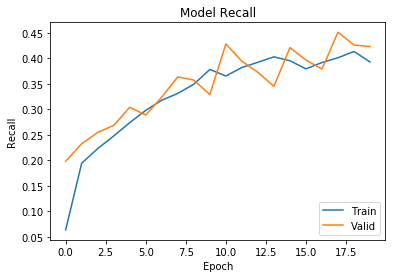

In [70]:
NNM = Sequential()
NNM.add(Dense(64, activation='sigmoid', input_shape=(X_train.values.shape[1], )))  # X_train_NN.shape[1] = 63
NNM.add(Dropout(.2))
NNM.add(Dense(1, activation='sigmoid'))

NNM.compile(loss='binary_crossentropy', optimizer='adam', metrics=[recall])

checkpointer = ModelCheckpoint('weights_best_sigmoid_adam_fin.hdf5', 
                               monitor=recall, verbose=1, save_best_only=False, mode='max')
hist = NNM.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), 
        epochs=20, batch_size=40, callbacks=[checkpointer], verbose=1)

plot_loss(hist)
plot_recall(hist)

In [169]:
# y_nnm_prob = NNM.predict(X_test.values)
# y_nnm_pred = y_nnm_prob.argmax(axis=-1)

y_nnm_prob = NNM.predict(X_test.values)#[:,0]
y_nnm_pred = y_nnm_prob.astype(int)

# y_nnm_pred = NNM.predict_classes(X_test.values)

# y_nnm_pred = NNM.predict(X_test.values, batch_size=2).astype(int)

# print (type(y_nnm_pred_0))
print (type(y_nnm_pred))
print (y_nnm_prob.shape)
print (y_nnm_prob)

<class 'numpy.ndarray'>
(8238, 1)
[[0.43526223]
 [0.41974   ]
 [0.4410313 ]
 ...
 [0.4549987 ]
 [0.42398605]
 [0.43883732]]


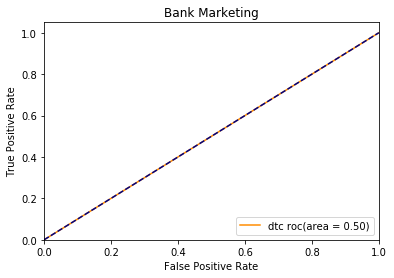

In [170]:
plot_roc_curve(y_test, y_nnm_pred)

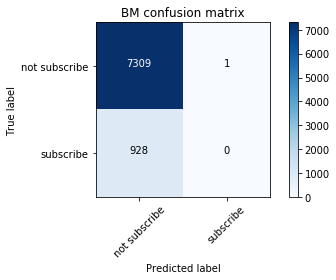

In [168]:

confusion_matrix_NNM = confusion_matrix(y_test, y_nnm_pred)
plot_confusion_matrix(confusion_matrix_NNM)

In [140]:
X_train = train_upsample.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)
y_train = train_upsample['y']
y_test = test_set['y']

NNM = Sequential()
NNM.add(Dense(64, activation='sigmoid', input_shape=(X_train.values.shape[1], )))  # X_train_NN.shape[1] = 63
NNM.add(Dropout(.2))
NNM.add(Dense(1, activation='sigmoid'))

NNM.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.categorical_accuracy])

checkpointer = ModelCheckpoint('weights_best_sigmoid_adam_fin.hdf5', 
                               monitor='val_loss', verbose=1, save_best_only=False, mode=min)
history = nnm.fit(X_train.values, y_train.values, #validation_data=(X_val_NN, y_val_NN), 
        epochs=40, batch_size=40, callbacks=[checkpointer], verbose=1)

Epoch 1/40
58476/58476 [==============================] - 11s 184us/step - loss: 0.2240 - recall: 0.9535

Epoch 00001: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 2/40
58476/58476 [==============================] - 9s 159us/step - loss: 0.2242 - recall: 0.9508

Epoch 00002: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 3/40
58476/58476 [==============================] - 8s 133us/step - loss: 0.2227 - recall: 0.9538

Epoch 00003: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 4/40
58476/58476 [==============================] - 9s 148us/step - loss: 0.2218 - recall: 0.9532

Epoch 00004: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 5/40
58476/58476 [==============================] - 9s 154us/step - loss: 0.2222 - recall: 0.9534

Epoch 00005: saving model to weights_best_sigmoid_adam_fin.hdf5
Epoch 6/40
58476/58476 [==============================] - 9s 151us/step - loss: 0.2214 - recall: 0.9544

Epoch 00006: saving model to weights_best_sigmoid

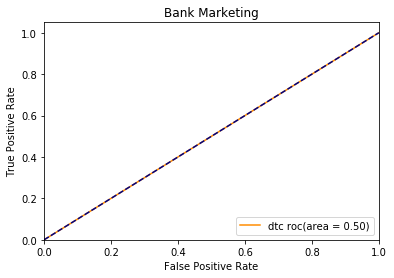

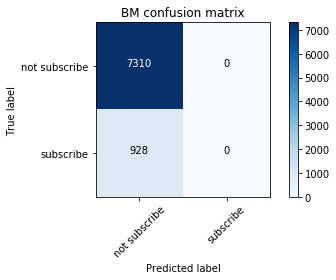

In [139]:
y_nnm_prob = NNM.predict(X_test.values)[:,0]
y_nnm_pred = (y_nnm_prob > 0.6).astype(int)
plot_roc_curve(y_test, y_nnm_pred)

confusion_matrix_NNM = confusion_matrix(y_test, y_nnm_pred)
plot_confusion_matrix(confusion_matrix_NNM)
